In [12]:
from urllib.request import urlopen, Request
from urllib.parse import quote
from bs4 import BeautifulSoup
import ssl
import json
import csv
import matplotlib.pyplot as plt
plt.rc('font', family='SimHei', size=13)
import numpy as np
import pandas as pd
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
def Pdouban(hotword ,number):   #定义一个爬虫函数,参数hotword是热词用于检索，number是检索数量
    #新建一个csv的文件
    csv_show = open('D:\office\爬豆瓣\豆瓣电影.csv', 'w', encoding='gbk', newline='')
    writer = csv.writer(csv_show)
    #CVS写入的参数为一个list
    writer.writerow(['热词', '电影名', '导演', '链接', '上映日期', '类型', '评分', '评价人数'])
    head = 'https://movie.douban.com'
    url = '/j/search_subjects?type=movie&tag='+hotword+'&page_limit='+number+'&page_start=0'
    url = quote(url, safe=";/?:@&=+$,", encoding="utf-8")   #将中文转成码
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
    ret = Request(head+url, headers=headers)
    html = urlopen(ret)
    bs = json.loads(html.read().decode('utf8')) #将json转化成字典
    # 新建一个列表接收所有电影信息
    movies = []

    for i in range(0, int(number)): #根据输入的数量开始循环
        movie_name = bs['subjects'][i]['title']     #电影名
        score = bs['subjects'][i]['rate']           #评分
        img_url = bs['subjects'][i]['cover']        #图片连接
        movieUrl = bs['subjects'][i]['url']         #获取一个电影详情的连接
        ret2 = Request(movieUrl, headers=headers)
        html2 = urlopen(ret2)
        bs2 = BeautifulSoup(html2, 'lxml')   #打开该电影链接
        subspan1 = bs2.find('div', {'id': 'content'})   #定位到所需信息的位置

        for b in subspan1.find_all('div', {'id': 'info'}):  #定位到基本信息位置
            attrs_name = b.find('span', {'class': 'attrs'}).get_text()              #导演
            actor = b.find('span', {'class': 'actor'}).get_text()                   #演员
            date = b.find('span', {'property': 'v:initialReleaseDate'}).get_text()  #上映日期
            types = b.find('span', {'property': 'v:genre'}).get_text()           #类型
            #area = b.xpath('//*[@id="info"]/text()[2]').get_text()                 #地区

        for b2 in subspan1.find_all('div', {'id': 'interest_sectl'}):
            rating_sum = b2.find('span', {'property': 'v:votes'}).get_text()         #评价人数

        for b3 in subspan1.find_all('div', {'class': 'related-info'}):
            indent = b3.find('div', {'class': 'indent'}).get_text()                   #简介

        html2 = urlopen(img_url)  # 打开海报链接
        d = "D:\office\爬豆瓣\电影海报/" + movie_name + ".jpg"  # 保存路径
        with open(d, 'wb') as f:
            f.write(html2.read())
            f.close()
            print("海报保存成功 " + movie_name)
            #显示海报
            lena = plt.imread("D:\office\爬豆瓣\电影海报/" + movie_name + ".jpg")
            plt.imshow(lena)
            plt.axis('off')
            plt.show()
        print('电影: ' + movie_name, end='')
        print(b.get_text(), end='')
        print('评分: '+score)
        print('评价人数: '+rating_sum+'人')
        print('简介: ' + indent)
        #将信息添加进列表中
        movies.append({'热词': hotword, '电影名': movie_name, '导演': attrs_name, '链接': movieUrl,
                            '上映日期': date, '类型': types, '评分': score, '评价人数': rating_sum})
        # 将电影信息写入cvs文件
        writer.writerow([movies[i]['热词'], movies[i]['电影名'], movies[i]['导演'], movies[i]['链接'], movies[i]['上映日期'],
                         movies[i]['类型'], movies[i]['评分'], movies[i]['评价人数']])
    # 关闭文件
    csv_show.close()

热词: 热门、最新、经典、豆瓣高分、冷门佳片、华语、动作、喜剧、爱情、科幻、悬疑、恐怖、治愈……
请输入需要检索的热词：经典
请输入需要检索的电影数（0-50）：10
海报保存成功 肖申克的救赎


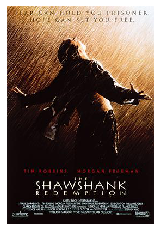

电影: 肖申克的救赎
导演: 弗兰克·德拉邦特
编剧: 弗兰克·德拉邦特 / 斯蒂芬·金
主演: 蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉尔·贝罗斯 / 马克·罗斯顿 / 詹姆斯·惠特摩 / 杰弗里·德曼 / 拉里·布兰登伯格 / 尼尔·吉恩托利 / 布赖恩·利比 / 大卫·普罗瓦尔 / 约瑟夫·劳格诺 / 祖德·塞克利拉 / 保罗·麦克兰尼 / 芮妮·布莱恩 / 阿方索·弗里曼 / V·J·福斯特 / 弗兰克·梅德拉诺 / 马克·迈尔斯 / 尼尔·萨默斯 / 耐德·巴拉米 / 布赖恩·戴拉特 / 唐·麦克马纳斯
类型: 剧情 / 犯罪
制片国家/地区: 美国
语言: 英语
上映日期: 1994-09-10(多伦多电影节) / 1994-10-14(美国)
片长: 142分钟
又名: 月黑高飞(港) / 刺激1995(台) / 地狱诺言 / 铁窗岁月 / 消香克的救赎
IMDb链接: tt0111161
评分: 9.7
评价人数: 2043925人
简介: 


                                    　　20世纪40年代末，小有成就的青年银行家安迪（蒂姆·罗宾斯 Tim Robbins 饰）因涉嫌杀害妻子及她的情人而锒铛入狱。在这座名为肖申克的监狱内，希望似乎虚无缥缈，终身监禁的惩罚无疑注定了安迪接下来灰暗绝望的人生。未过多久，安迪尝试接近囚犯中颇有声望的瑞德（摩根·弗里曼 Morgan Freeman 饰），请求对方帮自己搞来小锤子。以此为契机，二人逐渐熟稔，安迪也仿佛在鱼龙混杂、罪恶横生、黑白混淆的牢狱中找到属于自己的求生之道。他利用自身的专业知识，帮助监狱管理层逃税、洗黑钱，同时凭借与瑞德的交往在犯人中间也渐渐受到礼遇。表面看来，他已如瑞德那样对那堵高墙从憎恨转变为处之泰然，但是对自由的渴望仍促使他朝着心中的希望和目标前进。而关于其罪行的真相，似乎更使这一切朝前推进了一步……
                                        
                                    　　本片根据著名作家斯蒂芬·金（Stephen Edwin King）的...
                            
(展开全部)

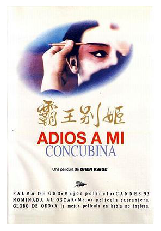

电影: 霸王别姬
导演: 陈凯歌
编剧: 芦苇 / 李碧华
主演: 张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉 / 尹治 / 马明威 / 费振翔 / 智一桐 / 李春 / 赵海龙 / 李丹 / 童弟 / 沈慧芬 / 黄斐 / 徐杰
类型: 剧情 / 爱情 / 同性
制片国家/地区: 中国大陆 / 中国香港
语言: 汉语普通话
上映日期: 1993-01-01(中国香港) / 1993-07-26(中国大陆)
片长: 171分钟 / 155分钟(美国剧场版)
又名: 再见，我的妾 / Farewell My Concubine
IMDb链接: tt0106332
评分: 9.6
评价人数: 1514666人
简介: 

                                　　段小楼（张丰毅）与程蝶衣（张国荣）是一对打小一起长大的师兄弟，两人一个演生，一个饰旦，一向配合天衣无缝，尤其一出《霸王别姬》，更是誉满京城，为此，两人约定合演一辈子《霸王别姬》。但两人对戏剧与人生关系的理解有本质不同，段小楼深知戏非人生，程蝶衣则是人戏不分。
                                    
                                　　段小楼在认为该成家立业之时迎娶了名妓菊仙（巩俐），致使程蝶衣认定菊仙是可耻的第三者，使段小楼做了叛徒，自此，三人围绕一出《霸王别姬》生出的爱恨情仇战开始随着时代风云的变迁不断升级，终酿成悲剧。
                        
©豆瓣

海报保存成功 阿甘正传


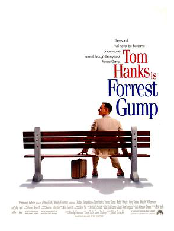

电影: 阿甘正传
导演: 罗伯特·泽米吉斯
编剧: 艾瑞克·罗斯 / 温斯顿·格鲁姆
主演: 汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / 海利·乔·奥斯蒙 / 迈克尔·康纳·亨弗里斯 / 哈罗德·G·赫瑟姆 / 山姆·安德森 / 伊俄涅·M·特雷奇 / 彼得·道博森 / 希芳·法隆 / 伊丽莎白·汉克斯 / 汉娜·豪尔 / 克里斯托弗·琼斯 / 罗布·兰德里 / 杰森·麦克奎尔 / 桑尼·施罗耶 / 艾德·戴维斯 / 丹尼尔C.斯瑞派克 / 大卫·布里斯宾 / 德博拉·麦克蒂尔 / 艾尔·哈林顿 / 阿非莫·奥米拉 / 约翰·沃德斯塔德 / 迈克尔·伯吉斯 / 埃里克·安德伍德 / 拜伦·明斯 / 斯蒂芬·布吉格沃特 / 约翰·威廉·高尔特 / 希拉里·沙普兰 / 伊莎贝尔·罗斯 / 理查德·达历山德罗 / 迪克·史迪威 / 迈克尔-杰斯 / 杰弗里·布莱克 / 瓦妮莎·罗斯 / 迪克·卡维特 / 马拉·苏查雷特扎 / 乔·阿拉斯奇 / W·本森·泰瑞
类型: 剧情 / 爱情
制片国家/地区: 美国
语言: 英语
上映日期: 1994-06-23(洛杉矶首映) / 1994-07-06(美国)
片长: 142分钟
又名: 福雷斯特·冈普
IMDb链接: tt0109830
评分: 9.5
评价人数: 1546336人
简介: 

                                　　阿甘（汤姆·汉克斯 饰）于二战结束后不久出生在美国南方阿拉巴马州一个闭塞的小镇，他先天弱智，智商只有75，然而他的妈妈是一个性格坚强的女性，她常常鼓励阿甘“傻人有傻福”，要他自强不息。
                                    
                                　　阿甘像普通孩子一样上学，并且认识了一生的朋友和至爱珍妮（罗宾·莱特·潘 饰），在珍妮和妈妈的爱护下，阿甘凭着上帝赐予的“飞毛腿”开始了一生不停的奔跑。
                                    
                                　　阿甘成为橄榄球巨星、越战英雄、乒乓球外交使者、亿万富翁，但是，他始终忘不了珍妮，几次匆匆的相聚和离别，更是加深了阿

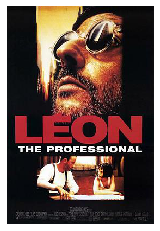

电影: 这个杀手不太冷
导演: 吕克·贝松
编剧: 吕克·贝松
主演: 让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔·巴达鲁科 / 艾伦·格里尼 / 伊丽莎白·瑞根 / 卡尔·马图斯维奇 / 弗兰克·赛格 / 麦温 / 乔治·马丁 / 罗伯特·拉萨多 / 亚当·布斯奇 / 马里奥·托迪斯科 / 萨米·纳塞利
类型: 剧情 / 动作 / 犯罪
制片国家/地区: 法国
语言: 英语 / 意大利语 / 法语
上映日期: 1994-09-14(法国)
片长: 110分钟(剧场版) / 133分钟(国际版)
又名: 杀手莱昂 / 终极追杀令(台) / 杀手里昂 / Leon / Leon: The Professional
IMDb链接: tt0110413
评分: 9.4
评价人数: 1738201人
简介: 

                                　　里昂（让·雷诺饰）是名孤独的职业杀手，受人雇佣。一天，邻居家小姑娘马蒂尔达（纳塔丽·波特曼饰)敲开他的房门，要求在他那里暂避杀身之祸。原来邻居家的主人是警方缉毒组的眼线，只因贪污了一小包毒品而遭恶警（加里·奥德曼饰）杀害全家的惩罚。马蒂尔达得到里昂的留救，幸免于难，并留在里昂那里。里昂教小女孩使枪，她教里昂法文，两人关系日趋亲密，相处融洽。
                                    
                                　　女孩想着去报仇，反倒被抓，里昂及时赶到，将女孩救回。混杂着哀怨情仇的正邪之战渐次升级，更大的冲突在所难免……
                        
©豆瓣

海报保存成功 千与千寻


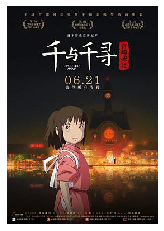

电影: 千与千寻
导演: 宫崎骏
编剧: 宫崎骏
主演: 柊瑠美 / 入野自由 / 夏木真理 / 菅原文太 / 中村彰男 / 玉井夕海 / 神木隆之介 / 内藤刚志 / 泽口靖子 / 我修院达也 / 大泉洋 / 小林郁夫 / 上条恒彦 / 小野武彦
类型: 剧情 / 动画 / 奇幻
官方网站: http://toho.co.jp/sentochihiro/index2.html
制片国家/地区: 日本
语言: 日语
上映日期: 2019-06-21(中国大陆) / 2001-07-20(日本)
片长: 125分钟
又名: 神隐少女(台) / 千与千寻的神隐 / Spirited Away / A Voyage of Chihiro / Sen to Chihiro no kamikakushi
IMDb链接: tt0245429
评分: 9.4
评价人数: 1602790人
简介: 

                                　　千寻和爸爸妈妈一同驱车前往新家，在郊外的小路上不慎进入了神秘的隧道——他们去到了另外一个诡异世界—一个中世纪的小镇。远处飘来食物的香味，爸爸妈妈大快朵颐，孰料之后变成了猪！这时小镇上渐渐来了许多样子古怪、半透明的人。
                                    
                                　　千寻仓皇逃出，一个叫小白的人救了他，喂了她阻止身体消 失的药，并且告诉她怎样去找锅炉爷爷以及汤婆婆，而且必须获得一份工作才能不被魔法变成别的东西。
                                    
                                　　千寻在小白的帮助下幸运地获得了一份在浴池打杂的工作。渐渐她不再被那些怪模怪样的人吓倒，并从小玲那儿知道了小白是凶恶的汤婆婆的弟子。
                                    
                                　　一次，千寻发现小白被一群白色飞舞的纸人打伤，为了救受伤的小白，她用河神送给她的药丸驱出了小白身体内的封印以及守封印的小妖精，但小白还是没有醒过来。
                               

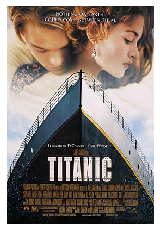

电影: 泰坦尼克号
导演: 詹姆斯·卡梅隆
编剧: 詹姆斯·卡梅隆
主演: 莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍 / 格劳瑞亚·斯图尔特 / 比尔·帕克斯顿 / 伯纳德·希尔 / 大卫·沃纳 / 维克多·加博 / 乔纳森·海德 / 苏茜·爱米斯 / 刘易斯·阿伯内西 / 尼古拉斯·卡斯柯恩 / 阿那托利·萨加洛维奇 / 丹尼·努齐 / 杰森·贝瑞 / 伊万·斯图尔特 / 艾恩·格拉法德 / 乔纳森·菲利普斯 / 马克·林赛·查普曼 / 理查德·格拉翰 / 保罗·布赖特威尔 / 艾瑞克·布里登 / 夏洛特·查顿 / 博纳德·福克斯 / 迈克尔·英塞恩 / 法妮·布雷特 / 马丁·贾维斯 / 罗莎琳·艾尔斯 / 罗切尔·罗斯 / 乔纳森·伊万斯-琼斯 / 西蒙·克雷恩 / 爱德华德·弗莱彻 / 斯科特·安德森 / 马丁·伊斯特 / 克雷格·凯利 / 格雷戈里·库克 / 利亚姆·图伊 / 詹姆斯·兰开斯特 / 艾尔莎·瑞雯 / 卢·帕尔特 / 泰瑞·佛瑞斯塔 / 凯文·德·拉·诺伊
类型: 剧情 / 爱情 / 灾难
制片国家/地区: 美国
语言: 英语 / 意大利语 / 德语 / 俄语
上映日期: 1998-04-03(中国大陆) / 1997-11-01(东京电影节) / 1997-12-19(美国)
片长: 194分钟 / 227分钟(白星版)
又名: 铁达尼号(港/台)
IMDb链接: tt0120338
评分: 9.4
评价人数: 1497657人
简介: 

                                　　1912年4月10日，号称 “世界工业史上的奇迹”的豪华客轮泰坦尼克号开始了自己的处女航，从英国的南安普顿出发驶往美国纽约。富家少女罗丝（凯特•温丝莱特）与母亲及未婚夫卡尔坐上了头等舱；另一边，放荡不羁的少年画家杰克（莱昂纳多·迪卡普里奥）也在码头的一场赌博中赢得了下等舱的船票。
                                    
                                　　罗丝厌倦了上流社会虚伪的生活，不愿嫁给卡尔，打算投海自尽，被杰克救起。很快，美丽活泼的罗丝与英俊开朗的杰克相爱，杰克带罗丝参加下等舱的舞会、为她画像，二人的感情逐渐升温

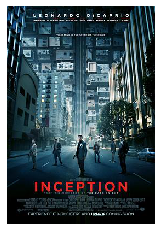

电影: 盗梦空间
导演: 克里斯托弗·诺兰
编剧: 克里斯托弗·诺兰
主演: 莱昂纳多·迪卡普里奥 / 约瑟夫·高登-莱维特 / 艾伦·佩吉 / 汤姆·哈迪 / 渡边谦 / 迪利普·劳 / 基里安·墨菲 / 汤姆·贝伦杰 / 玛丽昂·歌迪亚 / 皮特·波斯尔思韦特 / 迈克尔·凯恩 / 卢卡斯·哈斯 / 李太力 / 克莱尔·吉尔蕾 / 马格努斯·诺兰 / 泰勒·吉蕾 / 乔纳森·吉尔 / 水源士郎 / 冈本玉二 / 厄尔·卡梅伦 / 瑞恩·海沃德 / 米兰达·诺兰 / 拉什·费加 / 蒂姆·科勒赫 / 妲露拉·莱莉
类型: 剧情 / 科幻 / 悬疑 / 冒险
制片国家/地区: 美国 / 英国
语言: 英语 / 日语 / 法语
上映日期: 2010-09-01(中国大陆) / 2010-07-16(美国)
片长: 148分钟
又名: 潜行凶间(港) / 全面启动(台) / 奠基 / 心灵犯案 / 记忆迷阵 / 记忆魔方
IMDb链接: tt1375666
官方小站:
盗梦空间-Inception
评分: 9.3
评价人数: 1478237人
简介: 


                                    　　道姆·柯布（莱昂纳多·迪卡普里奥 Leonardo DiCaprio 饰）与同事阿瑟（约瑟夫·戈登-莱维特 Joseph Gordon-Levitt 饰）和纳什（卢卡斯·哈斯 Lukas Haas 饰）在一次针对日本能源大亨齐藤（渡边谦 饰）的盗梦行动中失败，反被齐藤利用。齐藤威逼利诱因遭通缉而流亡海外的柯布帮他拆分他竞争对手的公司，采取极端措施在其唯一继承人罗伯特·费希尔（希里安·墨菲 Cillian Murphy 饰）的深层潜意识中种下放弃家族公司、自立门户的想法。为了重返美国，柯布偷偷求助于岳父迈尔斯（迈克尔·凯恩 Michael Caine 饰），吸收了年轻的梦境设计师艾里阿德妮（艾伦·佩吉 Ellen Page 饰）、梦境演员艾姆斯（汤姆·哈迪 Tom Hardy 饰）和药剂师约瑟夫（迪利普·劳 Dileep Rao 饰）加入行动。在一层层...
                            
(展开全部)


                                　　道姆·柯布（莱昂纳多·迪卡普里奥 Leona

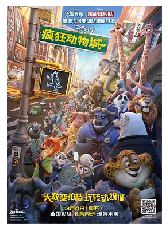

电影: 疯狂动物城
导演: 拜伦·霍华德 / 瑞奇·摩尔 / 杰拉德·布什
编剧: 拜伦·霍华德 / 瑞奇·摩尔 / 杰拉德·布什 / 吉姆·里尔顿 / 乔西·特立尼达 / 菲尔·约翰斯顿 / 珍妮弗·李
主演: 金妮弗·古德温 / 杰森·贝特曼 / 伊德里斯·艾尔巴 / 珍妮·斯蕾特 / 内特·托伦斯 / 邦尼·亨特 / 唐·雷克 / 汤米·钟 / J·K·西蒙斯 / 奥克塔维亚·斯宾瑟 / 艾伦·图代克 / 夏奇拉 / 雷蒙德·S·佩尔西 / 德拉·萨巴 / 莫里斯·拉马奇 / 菲尔·约翰斯顿 / 约翰·迪·马吉欧 / 凯蒂·洛斯 / 吉塔·雷迪 / 杰西·科尔蒂 / 汤米·利斯特 / 乔希·达拉斯 / 瑞奇·摩尔 / 凯斯·索西 / 彼得·曼斯布里奇 / 拜伦·霍华德 / 杰拉德·布什 / 马克·史密斯 / 乔西·特立尼达 / 约翰·拉维尔 / 克里斯汀·贝尔 / 吉尔·科德斯 / 梅利莎·古德温
类型: 喜剧 / 动画 / 冒险
制片国家/地区: 美国
语言: 英语 / 挪威语
上映日期: 2016-03-04(中国大陆/美国)
片长: 109分钟(中国大陆) / 108分钟
又名: 优兽大都会(港) / 动物方城市(台) / 动物乌托邦 / 动物大都会 / Zootropolis
IMDb链接: tt2948356
评分: 9.2
评价人数: 1293039人
简介: 

                                　　故事发生在一个所有哺乳类动物和谐共存的美好世界中，兔子朱迪（金妮弗·古德温 Ginnifer Goodwin 配音）从小就梦想着能够成为一名惩恶扬善的刑警，凭借着智慧和努力，朱迪成功的从警校中毕业进入了疯狂动物城警察局，殊不知这里是大型肉食类动物的领地，作为第一只，也是唯一的小型食草类动物，朱迪会遇到怎样的故事呢？
                                    
                                　　近日里，城中接连发生动物失踪案件，就在全部警员都致力于调查案件真相之时，朱迪却被局长（伊德瑞斯·艾尔巴 Idris Elba 配音）发配成为了一名无足轻重的交警。某日，正在执勤的兔子遇见了名为尼克（杰森·贝特曼 Jason Bateman 配音）的狐狸，两人不打不相识，

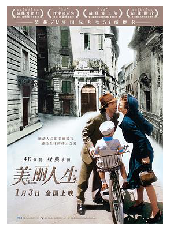

电影: 美丽人生
导演: 罗伯托·贝尼尼
编剧: 温琴佐·切拉米 / 罗伯托·贝尼尼
主演: 罗伯托·贝尼尼 / 尼可莱塔·布拉斯基 / 乔治·坎塔里尼 / 朱斯蒂诺·杜拉诺 / 赛尔乔·比尼·布斯特里克 / 玛丽萨·帕雷德斯 / 霍斯特·布赫霍尔茨 / 利迪娅·阿方西 / 朱利亚娜·洛约迪切 / 亚美利哥·丰塔尼 / 彼得·德·席尔瓦 / 弗朗西斯·古佐 / 拉法埃拉·莱博罗尼 / 克劳迪奥·阿方西 / 吉尔·巴罗尼 / 马西莫·比安奇 / 恩尼奥·孔萨尔维 / 吉安卡尔洛·科森蒂诺 / 阿伦·克雷格 / 汉尼斯·赫尔曼 / 弗兰科·梅斯科利尼 / 安东尼奥·普雷斯特 / 吉娜·诺维勒 / 理查德·塞梅尔 / 安德烈提多娜 / 迪尔克·范登贝格 / 奥梅罗·安东努蒂
类型: 剧情 / 喜剧 / 爱情 / 战争
制片国家/地区: 意大利
语言: 意大利语 / 德语 / 英语
上映日期: 2020-01-03(中国大陆) / 1997-12-20(意大利)
片长: 116分钟 / 125分钟(戛纳电影节)
又名: 一个快乐的传说(港) / Life Is Beautiful
IMDb链接: tt0118799
评分: 9.5
评价人数: 971338人
简介: 

                                　　犹太青年圭多（罗伯托·贝尼尼）邂逅美丽的女教师多拉（尼可莱塔·布拉斯基），他彬彬有礼的向多拉鞠躬：“早安！公主！”。历经诸多令人啼笑皆非的周折后，天遂人愿，两人幸福美满的生活在一起。
                                    
                                　　然而好景不长，法西斯政权下，圭多和儿子被强行送往犹太人集中营。多拉虽没有犹太血统，毅然同行，与丈夫儿子分开关押在一个集中营里。聪明乐天的圭多哄骗儿子这只是一场游戏，奖品就是一辆大坦克，儿子快乐、天真的生活在纳粹的阴霾之中。尽管集中营的生活艰苦寂寞，圭多仍然带给他人很多快乐，他还趁机在纳粹的广播里问候妻子：“早安！公主！”
                                    
                                　　法西斯政权即将倾覆，纳粹的集中营很快就要接受最后的清理，圭多

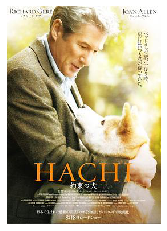

电影: 忠犬八公的故事
导演: 拉斯·霍尔斯道姆
编剧: 斯蒂芬·P·林赛 / 新藤兼人
主演: 理查·基尔 / 萨拉·罗默尔 / 琼·艾伦 / 罗比·萨布莱特 / 艾瑞克·阿瓦利 / 田川洋行 / 杰森·亚历山大 / 罗伯特·卡普荣
类型: 剧情
制片国家/地区: 美国 / 英国
语言: 英语 / 日语
上映日期: 2009-06-13(西雅图电影节) / 2010-03-12(英国)
片长: 93分钟
又名: 秋田犬八千(港) / 忠犬小八(台) / 忠犬传奇
IMDb链接: tt1028532
评分: 9.4
评价人数: 1027317人
简介: 


                                    　　八公（Forest 饰）是一条谜一样的犬，因为没有人知道它从哪里来。教授帕克（理查·基尔 Richard Gere 饰）在小镇的火车站拣到一只走失的小狗，冥冥中似乎注定小狗和帕克教授有着某种缘分，帕克一抱起这只小狗就再也放不下来，最终，帕克对小狗八公的疼爱感化了起初极力反对养狗的妻子卡特（琼·艾伦 Joan Allen 饰）。八公在帕克的呵护下慢慢长大，帕克上班时八公会一直把他送到车站，下班时八公也会早早便爬在车站等候，八公的忠诚让小镇的人家对它更加疼爱。有一天，八公在帕克要上班时表现异常，居然玩起了以往从来不会的捡球游戏，八公的表现让帕克非常满意，可是就是在那天，帕克因病去世。帕克的妻子、女儿安迪（萨拉·罗默尔 Sarah Roemer 饰）及女婿迈克尔（罗比·萨布莱特 Robbie Sublett 饰）怀着无比沉痛的心情埋葬了帕克，可是不明就里的...
                            
(展开全部)


                                　　八公（Forest 饰）是一条谜一样的犬，因为没有人知道它从哪里来。教授帕克（理查·基尔 Richard Gere 饰）在小镇的火车站拣到一只走失的小狗，冥冥中似乎注定小狗和帕克教授有着某种缘分，帕克一抱起这只小狗就再也放不下来，最终，帕克对小狗八公的疼爱感化了起初极力反对养狗的妻子卡特（琼·艾伦 Joan Allen 饰）。八公在帕克的呵护下慢慢长大，帕克上班时八公会一直把他送到车站，下班时八公也会早早便爬在车站等候，八公的忠诚让小镇的人家

In [8]:
print('热词: 热门、最新、经典、豆瓣高分、冷门佳片、华语、动作、喜剧、爱情、科幻、悬疑、恐怖、治愈……')
word = input('请输入需要检索的热词：')
num = input('请输入需要检索的电影数（0-50）：')
Pdouban(word, num)

In [9]:
df = pd.read_csv("D:\office\爬豆瓣/豆瓣电影.csv",encoding=u'gbk')
df

,热词,电影名,导演,链接,上映日期,类型,评分,评价人数
0,经典,肖申克的救赎,弗兰克·德拉邦特,https://movie.douban.com/subject/1292052/,1994-09-10(多伦多电影节),剧情,9.7,2043925
1,经典,霸王别姬,陈凯歌,https://movie.douban.com/subject/1291546/,1993-01-01(中国香港),剧情,9.6,1514666
2,经典,阿甘正传,罗伯特·泽米吉斯,https://movie.douban.com/subject/1292720/,1994-06-23(洛杉矶首映),剧情,9.5,1546336
3,经典,这个杀手不太冷,吕克·贝松,https://movie.douban.com/subject/1295644/,1994-09-14(法国),剧情,9.4,1738201
4,经典,千与千寻,宫崎骏,https://movie.douban.com/subject/1291561/,2019-06-21(中国大陆),剧情,9.4,1602790
5,经典,泰坦尼克号,詹姆斯·卡梅隆,https://movie.douban.com/subject/1292722/,1998-04-03(中国大陆),剧情,9.4,1497657
6,经典,盗梦空间,克里斯托弗·诺兰,https://movie.douban.com/subject/3541415/,2010-09-01(中国大陆),剧情,9.3,1478237
7,经典,疯狂动物城,拜伦·霍华德 / 瑞奇·摩尔 / 杰拉德·布什,https://movie.douban.com/subject/25662329/,2016-03-04(中国大陆/美国),喜剧,9.2,1293039
8,经典,美丽人生,罗伯托·贝尼尼,https://movie.douban.com/subject/1292063/,2020-01-03(中国大陆),剧情,9.5,971338
9,经典,忠犬八公的故事,拉斯·霍尔斯道姆,https://movie.douban.com/subject/3011091/,2009-06-13(西雅图电影节),剧情,9.4,1027317


In [61]:
def Visualization(Order):
    if (Order=='1'): Order = True
    else:Order = False 
    #print(Order)
    df.sort_values('评分', ascending=Order, inplace=True)
    fig = plt.figure(figsize=(16,8))
    x = df['电影名']
    y = df['评分']
    z = df['评价人数']
    plt.title('电影评分/评分人数')
    plt.xlabel('电影名',size=13)
    plt.ylabel('评分',size=13)
    #plt.zlabel('评价人数')
    ax1 = fig.add_subplot(111)
    #plt.xticks(rotation=60)
    width = 0.4
    plt.xticks(np.arange(len(x)), x)
    rects = ax1.bar(np.arange(len(x))-width/2, y,width=width,label=u'评分',color='r')
    plt.legend(loc=6)
    for rect in rects:
        rect_x = rect.get_x()
        rect_y = rect.get_height()
        plt.text(rect_x+width/2, rect_y+0.05, str(rect_y)+'分', ha='center')
    ax2 = ax1.twinx()
    rects2 = ax2.bar(np.arange(len(x))+width/2, z,width=width,label=u'评价人数')
    plt.legend(loc=5)
    for rect in rects2:
        rect_x = rect.get_x()
        rect_y = rect.get_height()
        plt.text(rect_x+width/2, rect_y+10000, str(rect_y)+'人', ha='center')
    plt.show()

升序输出扣1，降序随意扣。1


d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


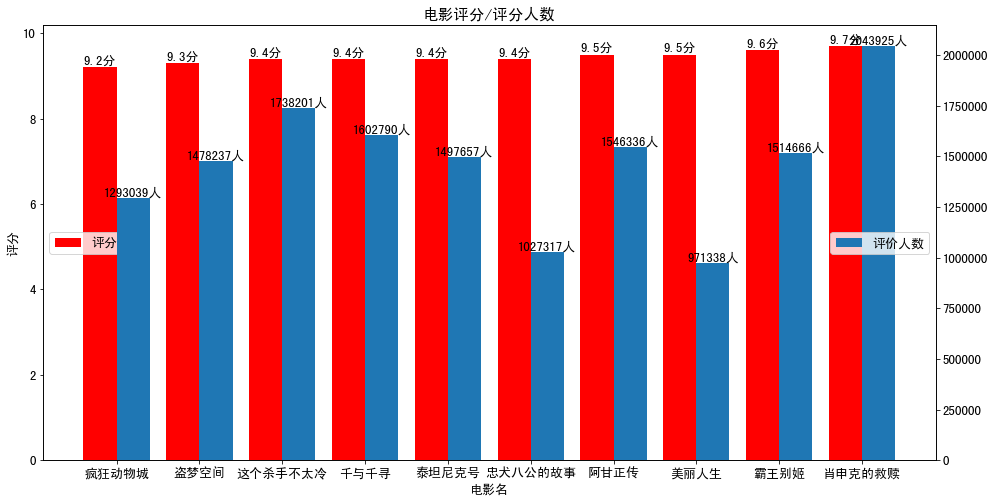

,热词,电影名,导演,链接,上映日期,类型,评分,评价人数
7,经典,疯狂动物城,拜伦·霍华德 / 瑞奇·摩尔 / 杰拉德·布什,https://movie.douban.com/subject/25662329/,2016-03-04(中国大陆/美国),喜剧,9.2,1293039
6,经典,盗梦空间,克里斯托弗·诺兰,https://movie.douban.com/subject/3541415/,2010-09-01(中国大陆),剧情,9.3,1478237
3,经典,这个杀手不太冷,吕克·贝松,https://movie.douban.com/subject/1295644/,1994-09-14(法国),剧情,9.4,1738201
4,经典,千与千寻,宫崎骏,https://movie.douban.com/subject/1291561/,2019-06-21(中国大陆),剧情,9.4,1602790
5,经典,泰坦尼克号,詹姆斯·卡梅隆,https://movie.douban.com/subject/1292722/,1998-04-03(中国大陆),剧情,9.4,1497657
9,经典,忠犬八公的故事,拉斯·霍尔斯道姆,https://movie.douban.com/subject/3011091/,2009-06-13(西雅图电影节),剧情,9.4,1027317
2,经典,阿甘正传,罗伯特·泽米吉斯,https://movie.douban.com/subject/1292720/,1994-06-23(洛杉矶首映),剧情,9.5,1546336
8,经典,美丽人生,罗伯托·贝尼尼,https://movie.douban.com/subject/1292063/,2020-01-03(中国大陆),剧情,9.5,971338
1,经典,霸王别姬,陈凯歌,https://movie.douban.com/subject/1291546/,1993-01-01(中国香港),剧情,9.6,1514666
0,经典,肖申克的救赎,弗兰克·德拉邦特,https://movie.douban.com/subject/1292052/,1994-09-10(多伦多电影节),剧情,9.7,2043925


In [62]:
s = input("升序输出扣1，降序随意扣。")
Visualization(s)
df